

# Richards' Equation, steady state

This is a simple verticle, pseudo-1D column of water with a water table below the surface.  It solves the pressure to steady-state.  For constant density and incompressible solid, this would be a linear pressure profile. (but we include a pressure-dependent density.)

The highlight of this problem is - 
#### Infiltration of water is taken into account: Neumann mass flux boundary - Top surface - -0.0005 $mol m^{-2} s^{-1}$
#### Initial hydrostatic head: - 3.0 m i.e. 7 m from the bottom! 
Input parameters:

1. Mesh size defined using Generated Mesh - Box type.
- Low coordinate - (0,0,0), High coordinate - (1,1,10), number of cells - (1,1,100)
- Creates a pseudo 1D water column with 100 cells along the z-direction.

2. Solves the Richards equation

3. Boundary condition - Neumann B.C: Mass flux on the top = -0.0005 mol m^{-2} s^{-1}

4. Water Retention Parameters [WRM] - Van Genuchten Model : $alpha$ [$Pa^{-1}$] = 0.00015, m [-] = 0.8, residual saturation [-] = 0.

5. Water content is calculated by Richards water content. 

\begin{equation}
            \theta = n * s * \phi *  {cell volume}
\end{equation}

where n = molar density of liquid phase [mol $m^{-3}$], s = saturation of phase [-], $\phi$ = porosity [-].

6. The relative permeability method - upwind with Darcy flux - Relative permeability is defined on cells, but must be calculated on faces to multiply a flux.

7. n = 0.25, K (Abs. permeability) = 2.5e-12 m^2, T_{initial} = 275.15 K,  g = (0,0,-9.8006m ms^{-2}), n_l = 55000 mol m^{-3}, dynamic_viscosity = 0.00089 Pas, Pore compressibility =  1e-09 Pa^{-1}.

8. Hydrostatic head [m] = -3.0 m, Hydrostatic water density = 1000 kg m^{-3}

9. Visualization - Entire domain, Times start period stop - (0, 0.1, -1) - (Start, period, stop). The time steps is 0.1, hence we will have a total of 10 results. 


### Richards equation:

For transient state, the 3-D Richard's equation in variably saturated domain is:
\begin{equation}
    \frac{\partial \theta}{\partial t} - \triangledown \frac{k_r n_l}{\mu} K (\triangledown p + \rho g \hat{z}) = Q_w 
\end{equation}

where, $\theta$ = Extensive water content of the cell [mol], t = time variable [s], $\triangledown$ = Divergence operator, $k_r$ = relative permeability [-], $n_l$ = molar density of liquid phase [mol $m^{-3}$], $\mu$ = Absolute (Dynamic) viscosity of water (Pas), K = Absolute permeability [$m^{2}$], p = liquid pressure [Pa], $\rho$ = density of water, $\hat{z}$ = elevation [m], $Q_w$ = mass source of water [mol $s^{-1}$] 

For steady state, $\frac{\partial \theta}{\partial t}$ = 0 and $Q_w$ = -0.0005 mol m^{-2} s^{-1}.

Hence the above equation reduces as:
\begin{equation}
    \triangledown \frac{k_r n_l}{\mu} K (\triangledown p + \rho g \hat{z}) = Q_w
\end{equation}

### Van-Genuchten Maulem  Model

#### Defined in the function - $wrm_{vangenuchten}$

The retention curve as given by [Schuh et al., 2017] :

If $P_c$ > 0, $S_*$ ($P_c$) = $S_r$ + (1 - $S_r$) $[1 + (\alpha P_c)^n]^{-m}$

else $S_*$ ($P_c$) = 1


Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}

where, $S_*$ - Retention curve for unfrozen liquid-gas phase, $S_r$ (-) - Residual saturation, $P_c$ (Pa) - Capillary pressure, and $\alpha$ ($Pa^{-1}$), and m = 1 - 1/n - model parameters, $s_l$ = saturation of liquid

The saturation of liquid and gas is equal to 1, i.e,

$s_l + s_g = 1$






The exponent m controls the shape of the soil retention curve and can be related to the pore size distribution of the texture, where larger values corresponds to smaller pore size variability i.e. to well-sorted textures.

Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}


$s_l = S_* [-\beta \rho_i h_0 \upsilon H (-\upsilon) + (S_*)^{-1} (s_l + s_i)]$
 - However this equation includes the ice phase! - What is the equation used by the demo problem?

Author: Ethan Coon (Initial code) and Radhakrishna

In [47]:
%matplotlib inline

In [48]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data
import numpy as np
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import xml.etree.ElementTree as ET

In [49]:
import warnings

warnings.filterwarnings('ignore')

In [50]:
file_name = 'inf_seepage.demo'
input_filename = 'infiltration_then_seepage.xml'

In [51]:
# load the ATS solution
directory = f"./{file_name}/"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)


 - Lighter color signifies earlier time steps. 

VGC parameters: alpha = 0.00015, m = 0.8, w_res = 0

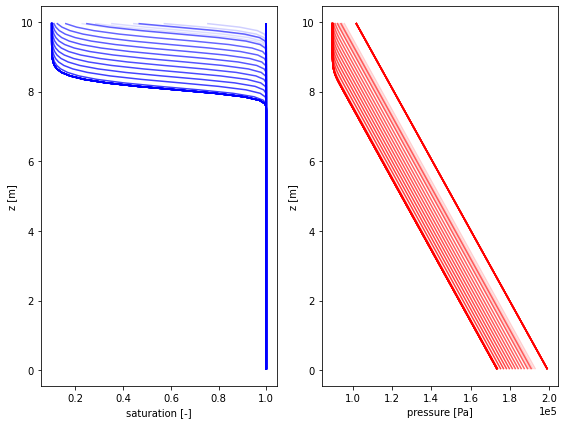

In [52]:
# plot the solution
fig = plt.figure(figsize=(8,6))
axs = fig.subplots(1,2)
plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[0], None, 'b')
plot_column_data.plot_subsurface(vis, ['pressure',], axs[1], None, 'r')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z [m]')
axs[1].set_xlabel('pressure [Pa]')
axs[1].set_ylabel('z [m]')
plt.tight_layout()
plt.show()

### Reading the input file

In [53]:
tree = ET.parse(f'{input_filename}')
root = tree.getroot()

In [54]:
print(root.tag, '\n', root.attrib)
# At the top level, the XML is rooted in the Parameter list with the 'Main' type 

ParameterList 
 {'name': 'Main', 'type': 'ParameterList'}


In [55]:
# Printing the mesh attributes 
print('Mesh - ParameterList \n')
for mesh in root[0].iter('ParameterList'):
    print(mesh.attrib)

print('\n')

print('Mesh - Parameters \n')
for mesh in root[0].iter('Parameter'):
    print(mesh.attrib)

Mesh - ParameterList 

{'name': 'mesh', 'type': 'ParameterList'}
{'name': 'domain', 'type': 'ParameterList'}
{'name': 'generate mesh parameters', 'type': 'ParameterList'}


Mesh - Parameters 

{'name': 'mesh type', 'type': 'string', 'value': 'generate mesh'}
{'name': 'build columns from set', 'type': 'string', 'value': 'surface'}
{'name': 'number of cells', 'type': 'Array(int)', 'value': '{1,1,100}'}
{'name': 'domain low coordinate', 'type': 'Array(double)', 'value': '{0.0,0.0,0.0}'}
{'name': 'domain high coordinate', 'type': 'Array(double)', 'value': '{1.0,1.0,10.0}'}


In [56]:
# Printing the mesh attributes 
print('State - ParameterList \n')
for mesh in root[5].iter('ParameterList'):
    print(mesh.attrib)

print('\n')

print('State - Parameters \n')
for mesh in root[5].iter('Parameter'):
    print(mesh.attrib)

State - ParameterList 

{'name': 'visualization'}
{'name': 'domain', 'type': 'ParameterList'}


State - Parameters 

{'name': 'times start period stop', 'type': 'Array(double)', 'value': '{0.0,0.02,-1.0}'}
{'name': 'times start period stop units', 'type': 'string', 'value': 'noleap'}


In [57]:
def plot(dirname, title):
    """A generic plotting function that plots saturation as a function of depth."""
    fig = plt.figure()

    vis = ats_xdmf.VisFile(dirname, time_unit='d')
    vis.loadMesh(columnar=True)
    
    # plot the solution
    ax = fig.subplots(1,1)
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], ax, None, cmap='jet')

    ax.set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

Plot by Author - Ethan coon - The first example simply looks at infiltrating into a column, slowly filling up the subsurface.  Note that the color scheme goes from the initial condition in blue to later times in red.

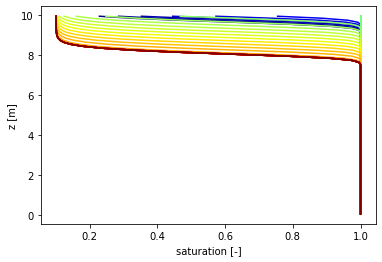

In [58]:
plot(f"{file_name}/", "infiltration to seepage face")

### RK - work

In [59]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    porosity = hdf.get('base_porosity.cell.0')
    print(porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


<HDF5 group "/base_porosity.cell.0" (51 members)>


* Has a total of 11 members (10 for results and 1 for initial condition)

In [60]:
def inputfiles_pddataframes(file_name,t):
    """
    The function is defined to read the input files from the ats simulation. 
    For each time instance, a dataframe can store the data.
 
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    t : The time instance at which the data is required.
    Ex: cell_volume.cell.0/{t} - here 0/0 - signifies the first directory (with data at t=0), 
    similary 0/1 - signifies the second directory (with data at t=1).
            
    Output parameters:
    
    data_results : pandas dataframe with all the key elements of the simulation.
    
    """
    
    with h5py.File(file_name,'r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0/{t}'))
        cell_volume = cell_volume_all.flatten()

        # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
        # Can we simplify the code?
        z = np.arange(0.0,10.0,0.1)
        data_results = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

        mass_density_all = np.array(hdf.get(f'mass_density_liquid.cell.0/{t}'))
        mass_density = mass_density_all.flatten()
        data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density



        molar_density_all = np.array(hdf.get(f'molar_density_liquid.cell.0/{t}'))
        molar_density = molar_density_all.flatten()
        data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density


        permeability_all = np.array(hdf.get(f'permeability.cell.0/{t}'))
        permeability = permeability_all.flatten()
        data_results['Absolute permeability [K] (m^{2})'] = permeability



        porosity_all = np.array(hdf.get(f'porosity.cell.0/{t}'))
        porosity = porosity_all.flatten()
        data_results['Porosity [phi] (-)'] = porosity

        pressure_all = np.array(hdf.get(f'pressure.cell.0/{t}'))
        pressure = pressure_all.flatten()
        data_results['Abs pressure [p_abs] [Pa]'] = pressure 
        # Water pressure or total pressure (Atm + water)? - Probably both

        relative_permeability_all = np.array(hdf.get(f'relative_permeability.cell.0/{t}'))
        relative_permeability = relative_permeability_all.flatten()
        data_results['Relative permeability [kr] [-]'] = relative_permeability


        saturation_gas_all = np.array(hdf.get(f'saturation_gas.cell.0/{t}'))
        saturation_gas = saturation_gas_all.flatten()
        data_results['Saturation of gas [s_g] [-]'] = saturation_gas


        saturation_liquid_all = np.array(hdf.get(f'saturation_liquid.cell.0/{t}'))
        saturation_liquid = saturation_liquid_all.flatten()
        data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid


        #temperature_all = np.array(hdf.get(f'temperature.cell.0/{t}'))
        #temperature = temperature_all.flatten()
        #data_results['Temperature [T] [K]'] = temperature


        viscosity_liquid_all = np.array(hdf.get(f'viscosity_liquid.cell.0/{t}'))
        viscosity_liquid = viscosity_liquid_all.flatten()
        data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid


        water_content_all = np.array(hdf.get(f'water_content.cell.0/{t}'))
        water_content = water_content_all.flatten()
        data_results['water_content [theta] mols'] = water_content
        
        return data_results

In [61]:
# Determining the time instances at which the data is stored

with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        print(time_period)
        # Time series stored in an irregular format! - 
        # ['0' '100' '103' '104' '105' '106' '107' '108' '109' '110' '111']

[  0 103 113 123 133 143 153 163 173 183 193 203 213 223  23 233 243 253
 263 276 286 296 306 316 326  33 336 346 356 366 376 386 396 406 416 426
  43 436 446 456 466 476 486 496 506 516  53  63  73  83  93]


### Storing the data for all time instances

In [62]:
for i in time_period:
    # https://stackoverflow.com/questions/1060090/changing-variable-names-with-python-for-loops
    locals()["data_results_"+str(i)] = inputfiles_pddataframes(file_name=f'{file_name}/ats_vis_data.h5', t=i)

### Plotting the initial pressure:

In [63]:
data_results_0['Abs pressure [p_abs] [Pa]']

0.0    189094.5175
0.1    188113.8525
0.2    187133.1875
0.3    186152.5225
0.4    185171.8575
          ...     
9.5     95931.3425
9.6     94950.6775
9.7     93970.0125
9.8     92989.3475
9.9     92008.6825
Name: Abs pressure [p_abs] [Pa], Length: 100, dtype: float64

In [64]:
rho_avg = 1000 # kg m^{-3} - Provided by the developer 
g = 9.8006 # ms^{-2} - Provided by the user, g = (0,0,-9.8006m ms^{-2})
p_0 = 101325 # Pa

# Calculating the water pressure = p_abs -p_0
data_results_0['Water pressure [p_l] [Pa]'] = data_results_0['Abs pressure [p_abs] [Pa]'] - p_0

data_results_0['Pressure head [m]'] = data_results_0['Water pressure [p_l] [Pa]']/(rho_avg*g)

data_results_0['Elevation head [m]'] = data_results_0.index

data_results_0['Hydraulic head [m]'] = data_results_0['Pressure head [m]'] + data_results_0['Elevation head [m]']

data_results_0['Atmospheric pressure head [m]'] = 101325/(rho_avg*g)

data_results_0

,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Abs pressure [p_abs] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],viscosity_liquid [v] Pas],water_content [theta] mols,Water pressure [p_l] [Pa],Pressure head [m],Elevation head [m],Hydraulic head [m],Atmospheric pressure head [m]
0.0,0.1,1000.0,55000.0,2.500000e-12,0.250087,189094.5175,6.179775,0.000000,1.000000,0.00089,1375.479982,87769.5175,8.955525,0.0,8.955525,10.338653
0.1,0.1,1000.0,55000.0,2.500000e-12,0.250086,188113.8525,6.179775,0.000000,1.000000,0.00089,1375.474589,86788.8525,8.855463,0.1,8.955463,10.338653
0.2,0.1,1000.0,55000.0,2.500000e-12,0.250085,187133.1875,6.179775,0.000000,1.000000,0.00089,1375.469195,85808.1875,8.755401,0.2,8.955401,10.338653
0.3,0.1,1000.0,55000.0,2.500000e-12,0.250084,186152.5225,6.179775,0.000000,1.000000,0.00089,1375.463801,84827.5225,8.655340,0.3,8.955340,10.338653
0.4,0.1,1000.0,55000.0,2.500000e-12,0.250083,185171.8575,6.179775,0.000000,1.000000,0.00089,1375.458408,83846.8575,8.555278,0.4,8.955278,10.338653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.1,1000.0,55000.0,2.500000e-12,0.250000,95931.3425,2.406664,0.211866,0.788134,0.00089,1083.683932,-5393.6575,-0.550340,9.5,8.949660,10.338653
9.6,0.1,1000.0,55000.0,2.500000e-12,0.250000,94950.6775,1.114235,0.374904,0.625096,0.00089,859.507075,-6374.3225,-0.650401,9.6,8.949599,10.338653
9.7,0.1,1000.0,55000.0,2.500000e-12,0.250000,93970.0125,0.422678,0.539265,0.460735,0.00089,633.510086,-7354.9875,-0.750463,9.7,8.949537,10.338653
9.8,0.1,1000.0,55000.0,2.500000e-12,0.250000,92989.3475,0.144965,0.673772,0.326228,0.00089,448.563330,-8335.6525,-0.850525,9.8,8.949475,10.338653


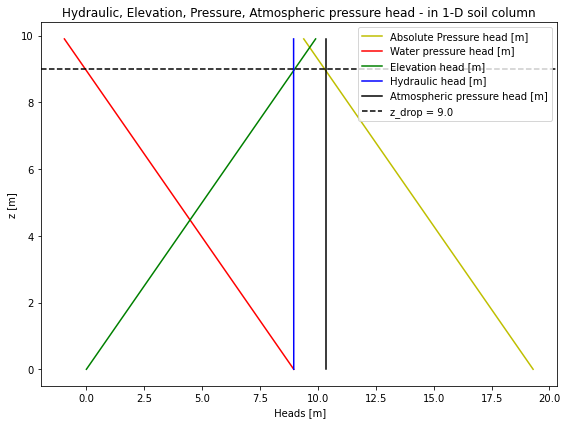

In [65]:
# To find the elevation where -ve pressure head begins
z_drop = data_results_0[data_results_0['Pressure head [m]'].le(0)].index[0]

z = np.arange(0,10,0.1)

fig = plt.figure(figsize=(8,6))

plt.title('Hydraulic, Elevation, Pressure, Atmospheric pressure head - in 1-D soil column')
plt.plot(data_results_0['Abs pressure [p_abs] [Pa]']/(rho_avg*g), z, 'y', label='Absolute Pressure head [m]')
plt.plot(data_results_0['Pressure head [m]'], z, 'r', label='Water pressure head [m]')
plt.plot(data_results_0['Elevation head [m]'], z, 'g', label='Elevation head [m]')
plt.plot(data_results_0['Hydraulic head [m]'], z, 'b', label='Hydraulic head [m]')
plt.plot(data_results_0['Atmospheric pressure head [m]'], z, 'k', label='Atmospheric pressure head [m]')
plt.axhline(y=z_drop,color='k',linestyle='--',label=f'z_drop = {z_drop}')
plt.ylabel('z [m]')
plt.xlabel(' Heads [m]')
plt.legend()
plt.tight_layout()
plt.show()

### Plotting relative permeability

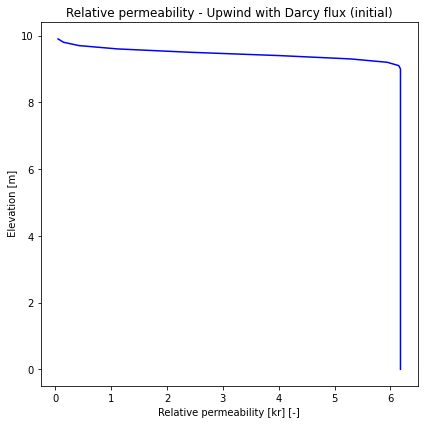

In [66]:
fig = plt.figure(figsize=(6,6))

plt.title('Relative permeability - Upwind with Darcy flux (initial)')
plt.plot(data_results_0['Relative permeability [kr] [-]'],z, 'b')

plt.xlabel('Relative permeability [kr] [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
#plt.show()

#### Calculating the saturation based on VanGenuchten's model


In [67]:
# data_results_VGC = pd.DataFrame(data=data_results['Water pressure [p] [Pa]'].values,index=

In [68]:
#data_results_VGC['ad'] = data_results['Water pressure [p] [Pa]']*10

In [69]:
##### Parameters that we assigned:
#alpha = 0.00015
#m = 0.8
#Sr = 0
#n = 1/(1-m)
#data_results_VGC = data_results.copy()
#data_results_VGC['S_*'] = Sr + (1 - Sr) * pow(1 + pow(alpha*data_results_VGC['Water pressure [p] [Pa]'],n),(-m))
#data_results_VGC['S_*(Pc)'] =  pow(1 + pow(alpha * data_results['Water pressure [p] [Pa]'],n),(-m))


How do you find out saturation of the liquid?

### Plotting initial saturation :

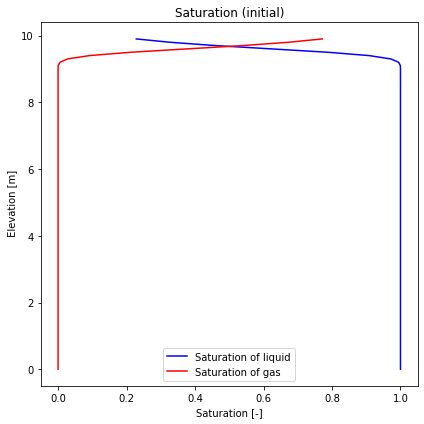

In [70]:
fig = plt.figure(figsize=(6,6))

plt.title('Saturation (initial)')
plt.plot(data_results_0['Saturation of liquid [s_l] [-]'], z, 'b', label='Saturation of liquid')
plt.plot(data_results_0['Saturation of gas [s_g] [-]'], z, 'r', label='Saturation of gas')

plt.xlabel('Saturation [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
plt.legend()
#plt.show()

In [71]:
### Plotting Richards water content

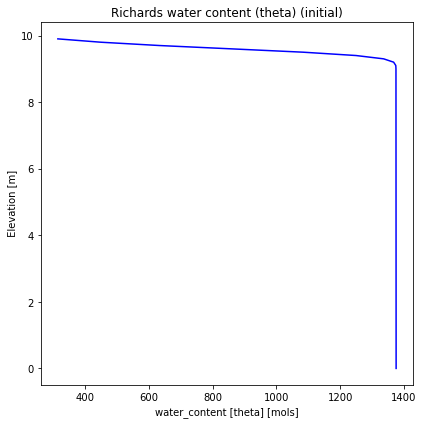

In [72]:
fig = plt.figure(figsize=(6,6))

plt.title('Richards water content (theta) (initial)')
plt.plot(data_results_0['water_content [theta] mols'],z, 'b')

plt.xlabel('water_content [theta] [mols]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
#plt.show()

### Plotting the saturation results

In [74]:
time_period

array([  0, 103, 113, 123, 133, 143, 153, 163, 173, 183, 193, 203, 213,
       223,  23, 233, 243, 253, 263, 276, 286, 296, 306, 316, 326,  33,
       336, 346, 356, 366, 376, 386, 396, 406, 416, 426,  43, 436, 446,
       456, 466, 476, 486, 496, 506, 516,  53,  63,  73,  83,  93])

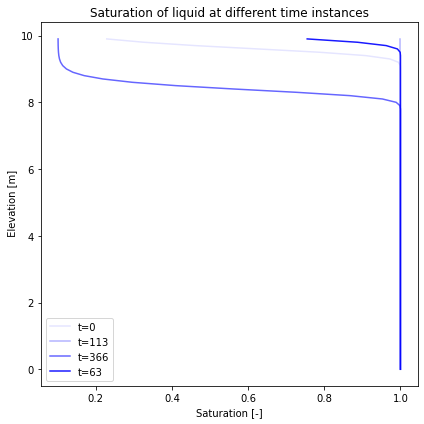

In [78]:
fig = plt.figure(figsize=(6,6))

plt.title('Saturation of liquid at different time instances')
plt.plot(data_results_0['Saturation of liquid [s_l] [-]'], z, 'b', alpha=0.1, label='t=0')
plt.plot(data_results_113['Saturation of liquid [s_l] [-]'], z, 'b', alpha=0.3, label='t=113')
plt.plot(data_results_366['Saturation of liquid [s_l] [-]'], z, 'b', alpha=0.6, label='t=366')
plt.plot(data_results_63['Saturation of liquid [s_l] [-]'], z, 'b', alpha=0.9, label='t=63')
#plt.axvline(x=data_results_113['Saturation of liquid [s_l] [-]'].min(),color='k',linestyle='--',label='residual_saturation')
plt.xlabel('Saturation [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
plt.legend()
#plt.show()

Comments:
    
* Due to the infiltration of water into the 1-D column, the saturation of water increases with time proportional to the incoming water flux.

* Why does the residual water saturation increase? Due to the influx of water?